# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from config import api
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

In [36]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
#* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [37]:
url = "http://api.openweathermap.org/data/2.5/weather"
query = "Nashville"
url_params = {
    "api" : api,
    "q" : query,
    'page': 2
}
city_name = []
Lat = []
Long = []
MaxTemp = []
Humidity = []
Cloundiness = []
WindSpeed = []
Date = []
#enum
for city in cities:
   
    try: 
        # Build partial query URL
        query_url = f"{url}?units=Imperial&appid={api}&q={city}"
        #query_url
    

    
        print("City : ",city)
        city_weather = requests.get(query_url).json()
    
    
    
        print(city_weather)
        city_name.append(city_weather['name'])
        Lat.append(city_weather['coord']['lat'])
        Long.append(city_weather['coord']['lon'])
        MaxTemp.append(city_weather['main']['temp_max'])
        Humidity.append(city_weather['main']['humidity'])
        Cloundiness.append(city_weather['clouds']['all'])
        WindSpeed.append(city_weather['wind']['speed'])
      
    except: 
        print("City not found")
    
    time.sleep(1)
print(city_name) 
    

City :  karamea
{'cod': '404', 'message': 'city not found'}
City not found
City :  ghansor
{'coord': {'lon': 79.95, 'lat': 22.65}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 87.58, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1011, 'humidity': 61}, 'visibility': 3000, 'wind': {'speed': 2.24, 'deg': 50}, 'clouds': {'all': 40}, 'dt': 1603546484, 'sys': {'type': 1, 'id': 9066, 'country': 'IN', 'sunrise': 1603500036, 'sunset': 1603541272}, 'timezone': 19800, 'id': 1271374, 'name': 'Ghansor', 'cod': 200}
City :  manaure
{'coord': {'lon': -72.44, 'lat': 11.78}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 86.74, 'feels_like': 89.06, 'temp_min': 86.74, 'temp_max': 86.74, 'pressure': 1011, 'humidity': 71, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 15.5, 'deg': 102}, 'clouds': {'a

City :  atuona
{'coord': {'lon': -139.03, 'lat': -9.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.26, 'feels_like': 74.95, 'temp_min': 78.26, 'temp_max': 78.26, 'pressure': 1012, 'humidity': 77, 'sea_level': 1012, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 19.82, 'deg': 77}, 'clouds': {'all': 5}, 'dt': 1603546504, 'sys': {'country': 'PF', 'sunrise': 1603550891, 'sunset': 1603595519}, 'timezone': -34200, 'id': 4020109, 'name': 'Atuona', 'cod': 200}
City :  jertih
{'coord': {'lon': 102.49, 'lat': 5.73}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 80.33, 'feels_like': 91.02, 'temp_min': 80.01, 'temp_max': 80.6, 'pressure': 1010, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 0.92, 'deg': 76}, 'clouds': {'all': 20}, 'dt': 1603546506, 'sys': {'type': 1, 'id': 9431, 'country': 'MY', 'sunrise': 1603493729

City :  hay river
{'coord': {'lon': -115.8, 'lat': 60.82}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.2, 'feels_like': 10.17, 'temp_min': 21.2, 'temp_max': 21.2, 'pressure': 1031, 'humidity': 85}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 250}, 'clouds': {'all': 75}, 'dt': 1603546525, 'sys': {'type': 1, 'id': 819, 'country': 'CA', 'sunrise': 1603550960, 'sunset': 1603584300}, 'timezone': -21600, 'id': 5972762, 'name': 'Hay River', 'cod': 200}
City :  mahebourg
{'coord': {'lon': 57.7, 'lat': -20.41}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 73, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1017, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 150}, 'clouds': {'all': 75}, 'dt': 1603546526, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1603503101, 'sunse

City :  lata
{'coord': {'lon': -8.33, 'lat': 40.16}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 63, 'feels_like': 63.99, 'temp_min': 60.01, 'temp_max': 64.99, 'pressure': 1025, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 107, 'gust': 5.01}, 'clouds': {'all': 96}, 'dt': 1603546544, 'sys': {'type': 3, 'id': 2016210, 'country': 'PT', 'sunrise': 1603522431, 'sunset': 1603561248}, 'timezone': 3600, 'id': 2738381, 'name': 'Lata', 'cod': 200}
City :  akdagmadeni
{'coord': {'lon': 35.88, 'lat': 39.66}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 66.81, 'feels_like': 61.21, 'temp_min': 66.81, 'temp_max': 66.81, 'pressure': 1017, 'humidity': 29, 'sea_level': 1017, 'grnd_level': 873}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 339}, 'rain': {'1h': 0.10640000000000001}, 'clouds': {'all': 98}, 'dt': 16035

City :  cidreira
{'coord': {'lon': -50.21, 'lat': -30.18}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 75.42, 'feels_like': 76.82, 'temp_min': 75.42, 'temp_max': 75.42, 'pressure': 1013, 'humidity': 69, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 6.53, 'deg': 75}, 'clouds': {'all': 98}, 'dt': 1603546562, 'sys': {'country': 'BR', 'sunrise': 1603528355, 'sunset': 1603575425}, 'timezone': -10800, 'id': 3466165, 'name': 'Cidreira', 'cod': 200}
City :  reforma
{'coord': {'lon': -91.02, 'lat': 18.1}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 76.98, 'feels_like': 83.57, 'temp_min': 76.98, 'temp_max': 76.98, 'pressure': 1014, 'humidity': 93, 'sea_level': 1014, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 6.46, 'deg': 287}, 'rain': {'1h': 0.14}, 'clouds': {'all': 50}, 'dt': 1603546

City :  jieshi
{'coord': {'lon': 115.83, 'lat': 22.81}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 75, 'feels_like': 66.51, 'temp_min': 75, 'temp_max': 75, 'pressure': 1012, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 22.88, 'deg': 62}, 'rain': {'1h': 0.27}, 'clouds': {'all': 100}, 'dt': 1603546581, 'sys': {'type': 3, 'id': 2000938, 'country': 'CN', 'sunrise': 1603491432, 'sunset': 1603532656}, 'timezone': 28800, 'id': 1805857, 'name': 'Jieshi', 'cod': 200}
City :  marhaura
{'coord': {'lon': 84.87, 'lat': 25.97}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 82.69, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1006, 'humidity': 69}, 'visibility': 3500, 'wind': {'speed': 4.7, 'deg': 210}, 'clouds': {'all': 0}, 'dt': 1603546582, 'sys': {'type': 1, 'id': 9129, 'country': 'IN', 'sunrise': 1603499051, 'sunset

City :  port-gentil
{'coord': {'lon': 8.78, 'lat': -0.72}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 87.8, 'feels_like': 89.71, 'temp_min': 87.8, 'temp_max': 87.8, 'pressure': 1010, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 200}, 'clouds': {'all': 75}, 'dt': 1603546460, 'sys': {'type': 1, 'id': 2188, 'country': 'GA', 'sunrise': 1603515893, 'sunset': 1603559574}, 'timezone': 3600, 'id': 2396518, 'name': 'Port-Gentil', 'cod': 200}
City :  huntingdon
{'coord': {'lon': -0.19, 'lat': 52.33}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 59.41, 'feels_like': 52.74, 'temp_min': 59, 'temp_max': 60.01, 'pressure': 998, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 14, 'deg': 179, 'gust': 25.01}, 'clouds': {'all': 100}, 'dt': 1603546600, 'sys': {'type': 3, 'id': 2011271, 'country': 'GB', 'su

City :  matadi
{'coord': {'lon': 13.45, 'lat': -5.82}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 85.17, 'feels_like': 89.04, 'temp_min': 85.17, 'temp_max': 85.17, 'pressure': 1008, 'humidity': 65, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 8.57, 'deg': 241}, 'clouds': {'all': 100}, 'dt': 1603546618, 'sys': {'country': 'CD', 'sunrise': 1603514513, 'sunset': 1603558713}, 'timezone': 3600, 'id': 2313002, 'name': 'Matadi', 'cod': 200}
City :  puerto cabello
{'coord': {'lon': -68.01, 'lat': 10.47}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 83.12, 'feels_like': 91.13, 'temp_min': 83.12, 'temp_max': 83.12, 'pressure': 1013, 'humidity': 72, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 2.28, 'deg': 36}, 'clouds': {'all': 48}, 'dt': 1603546619, 'sys': {

City :  sao filipe
{'coord': {'lon': -24.5, 'lat': 14.9}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 82.09, 'feels_like': 85.26, 'temp_min': 82.09, 'temp_max': 82.09, 'pressure': 1014, 'humidity': 73, 'sea_level': 1014, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 10.31, 'deg': 23}, 'clouds': {'all': 12}, 'dt': 1603546635, 'sys': {'country': 'CV', 'sunrise': 1603524683, 'sunset': 1603566758}, 'timezone': -3600, 'id': 3374210, 'name': 'São Filipe', 'cod': 200}
City :  tabiauea
{'cod': '404', 'message': 'city not found'}
City not found
City :  santa cruz del sur
{'coord': {'lon': -78, 'lat': 20.71}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.84, 'feels_like': 83.48, 'temp_min': 78.84, 'temp_max': 78.84, 'pressure': 1013, 'humidity': 84, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind':

City :  big spring
{'coord': {'lon': -101.48, 'lat': 32.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 39.2, 'feels_like': 32.05, 'temp_min': 39.2, 'temp_max': 39.2, 'pressure': 1023, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 110}, 'clouds': {'all': 1}, 'dt': 1603546460, 'sys': {'type': 1, 'id': 3489, 'country': 'US', 'sunrise': 1603544202, 'sunset': 1603584186}, 'timezone': -18000, 'id': 5517061, 'name': 'Big Spring', 'cod': 200}
City :  vila velha
{'coord': {'lon': -40.29, 'lat': -20.33}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 74.66, 'feels_like': 78.57, 'temp_min': 73, 'temp_max': 75.99, 'pressure': 1016, 'humidity': 94}, 'visibility': 5000, 'wind': {'speed': 9.24, 'deg': 54}, 'clouds': {'all': 90}, 'dt': 1603546657, 'sys': {'type': 1, 'id': 8474, 'country': 'BR', 'sunrise': 1603526612, 'sunset': 160

City :  saint-philippe
{'coord': {'lon': 55.77, 'lat': -21.36}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 68.14, 'feels_like': 58.14, 'temp_min': 61, 'temp_max': 75.2, 'pressure': 1017, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 20.8, 'deg': 130}, 'clouds': {'all': 20}, 'dt': 1603546675, 'sys': {'type': 1, 'id': 2127, 'country': 'RE', 'sunrise': 1603503507, 'sunset': 1603549406}, 'timezone': 14400, 'id': 935215, 'name': 'Saint-Philippe', 'cod': 200}
City :  cocobeach
{'coord': {'lon': 9.58, 'lat': 1}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 88.12, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1010, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 250}, 'clouds': {'all': 40}, 'dt': 1603546676, 'sys': {'type': 1, 'id': 2190, 'country': 'GA', 'sunrise': 160351578

City :  fortuna
{'coord': {'lon': -124.16, 'lat': 40.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50.47, 'feels_like': 48.04, 'temp_min': 46.4, 'temp_max': 52, 'pressure': 1017, 'humidity': 100}, 'visibility': 2816, 'wind': {'speed': 4.7, 'deg': 140}, 'clouds': {'all': 90}, 'dt': 1603546693, 'sys': {'type': 1, 'id': 4127, 'country': 'US', 'sunrise': 1603550290, 'sunset': 1603588984}, 'timezone': -25200, 'id': 5563839, 'name': 'Fortuna', 'cod': 200}
City :  santa cruz
{'coord': {'lon': -63.17, 'lat': -17.8}, 'weather': [{'id': 711, 'main': 'Smoke', 'description': 'smoke', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 86.68, 'feels_like': -115.04, 'temp_min': 86, 'temp_max': 87.8, 'pressure': 1010, 'humidity': 58}, 'visibility': 4000, 'wind': {'speed': 371.78, 'deg': 311}, 'clouds': {'all': 76}, 'dt': 1603546477, 'sys': {'type': 1, 'id': 8616, 'country': 'BO', 'sunrise': 1603532249, 'sunset':

City :  cayenne
{'coord': {'lon': -52.33, 'lat': 4.93}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 89.6, 'feels_like': 90.55, 'temp_min': 89.6, 'temp_max': 89.6, 'pressure': 1012, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 60}, 'clouds': {'all': 20}, 'dt': 1603546712, 'sys': {'type': 1, 'id': 8669, 'country': 'GF', 'sunrise': 1603530846, 'sunset': 1603573952}, 'timezone': -10800, 'id': 3382160, 'name': 'Cayenne', 'cod': 200}
City :  talnakh
{'coord': {'lon': 88.4, 'lat': 69.49}, 'weather': [{'id': 620, 'main': 'Snow', 'description': 'light shower snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 10.4, 'feels_like': -1.88, 'temp_min': 10.4, 'temp_max': 10.4, 'pressure': 1012, 'humidity': 85}, 'visibility': 4500, 'wind': {'speed': 11.18, 'deg': 200}, 'clouds': {'all': 75}, 'dt': 1603546713, 'sys': {'type': 1, 'id': 8951, 'country': 'RU', 'sunrise': 1603504503, 'sunset':

City :  antofagasta
{'coord': {'lon': -70.4, 'lat': -23.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 59, 'feels_like': 57.69, 'temp_min': 59, 'temp_max': 59, 'pressure': 1018, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 190}, 'clouds': {'all': 90}, 'dt': 1603546694, 'sys': {'type': 1, 'id': 8488, 'country': 'CL', 'sunrise': 1603533633, 'sunset': 1603579838}, 'timezone': -10800, 'id': 3899539, 'name': 'Antofagasta', 'cod': 200}
City :  praia da vitoria
{'coord': {'lon': -27.07, 'lat': 38.73}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 69.8, 'temp_min': 77, 'temp_max': 77, 'pressure': 1024, 'humidity': 50}, 'visibility': 10000, 'wind': {'speed': 16.64, 'deg': 259}, 'clouds': {'all': 20}, 'dt': 1603546731, 'sys': {'type': 1, 'id': 6895, 'country': 'PT', 'sunrise': 1603526815, '

City :  hualmay
{'coord': {'lon': -77.61, 'lat': -11.1}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 66.52, 'feels_like': 64.31, 'temp_min': 66.52, 'temp_max': 66.52, 'pressure': 1018, 'humidity': 71, 'sea_level': 1018, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 7.74, 'deg': 188}, 'clouds': {'all': 10}, 'dt': 1603546748, 'sys': {'country': 'PE', 'sunrise': 1603536085, 'sunset': 1603580846}, 'timezone': -18000, 'id': 3939761, 'name': 'Hualmay', 'cod': 200}
City :  banjar
{'coord': {'lon': 114.97, 'lat': -8.19}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 87.44, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1011, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 160}, 'clouds': {'all': 40}, 'dt': 1603546749, 'sys': {'type': 1, 'id': 9333, 'country': 'ID', 'sunrise': 1

City :  son la
{'coord': {'lon': 103.9, 'lat': 21.32}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 61.7, 'feels_like': 61.34, 'temp_min': 61.7, 'temp_max': 61.7, 'pressure': 1016, 'humidity': 70, 'sea_level': 1016, 'grnd_level': 939}, 'visibility': 10000, 'wind': {'speed': 1.68, 'deg': 151}, 'clouds': {'all': 100}, 'dt': 1603546766, 'sys': {'country': 'VN', 'sunrise': 1603494211, 'sunset': 1603535602}, 'timezone': 25200, 'id': 1567681, 'name': 'Son La', 'cod': 200}
City :  palmer
{'coord': {'lon': -72.33, 'lat': 42.16}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 61.59, 'feels_like': 60.13, 'temp_min': 60.8, 'temp_max': 62.01, 'pressure': 1013, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 180}, 'clouds': {'all': 90}, 'dt': 1603546767, 'sys': {'type': 1, 'id': 3598, 'country': 'US', 'sunrise': 

City :  naze
{'coord': {'lon': 129.48, 'lat': 28.37}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 69.8, 'feels_like': 64.26, 'temp_min': 69.8, 'temp_max': 69.8, 'pressure': 1017, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 350}, 'clouds': {'all': 40}, 'dt': 1603546495, 'sys': {'type': 1, 'id': 8002, 'country': 'JP', 'sunrise': 1603488488, 'sunset': 1603529048}, 'timezone': 32400, 'id': 1855540, 'name': 'Naze', 'cod': 200}
City :  warqla
{'cod': '404', 'message': 'city not found'}
City not found
City :  hovd
{'coord': {'lon': 91.64, 'lat': 48.01}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 36.66, 'feels_like': 24.57, 'temp_min': 36.66, 'temp_max': 36.66, 'pressure': 1024, 'humidity': 63, 'sea_level': 1024, 'grnd_level': 864}, 'visibility': 10000, 'wind': {'speed': 13.58, 'deg': 241}, 'clouds': {'a

City :  ambon
{'coord': {'lon': 128.18, 'lat': -3.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.01, 'feels_like': 73.24, 'temp_min': 80.01, 'temp_max': 80.01, 'pressure': 648, 'humidity': 14}, 'visibility': 10000, 'wind': {'speed': 4.38, 'deg': 124}, 'clouds': {'all': 95}, 'dt': 1603546801, 'sys': {'type': 3, 'id': 2033772, 'country': 'ID', 'sunrise': 1603487090, 'sunset': 1603531069}, 'timezone': 32400, 'id': 1651531, 'name': 'Ambon City', 'cod': 200}
City :  armizonskoye
{'coord': {'lon': 67.67, 'lat': 55.95}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 29.26, 'feels_like': 13.93, 'temp_min': 29.26, 'temp_max': 29.26, 'pressure': 1016, 'humidity': 97, 'sea_level': 1016, 'grnd_level': 1000}, 'visibility': 356, 'wind': {'speed': 20.04, 'deg': 170}, 'clouds': {'all': 100}, 'dt': 1603546803, 'sys': {'country': 'RU

City :  ancud
{'coord': {'lon': -73.82, 'lat': -41.87}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 49.32, 'feels_like': 40.68, 'temp_min': 44.01, 'temp_max': 54, 'pressure': 1013, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 350}, 'clouds': {'all': 20}, 'dt': 1603546820, 'sys': {'type': 1, 'id': 8512, 'country': 'CL', 'sunrise': 1603533046, 'sunset': 1603582066}, 'timezone': -10800, 'id': 3899695, 'name': 'Ancud', 'cod': 200}
City :  vaitupu
{'cod': '404', 'message': 'city not found'}
City not found
City :  sagua la grande
{'coord': {'lon': -80.08, 'lat': 22.81}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 81.34, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1012, 'humidity': 94}, 'visibility': 8000, 'wind': {'speed': 5.82, 'deg': 90}, 'clouds': {'all': 75}, 'dt': 1603546822, 

City :  fort saint james
{'coord': {'lon': -124.25, 'lat': 54.43}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 12.49, 'feels_like': 4.33, 'temp_min': 12.49, 'temp_max': 12.49, 'pressure': 1043, 'humidity': 91, 'sea_level': 1043, 'grnd_level': 954}, 'visibility': 10000, 'wind': {'speed': 4.25, 'deg': 325}, 'clouds': {'all': 0}, 'dt': 1603546839, 'sys': {'country': 'CA', 'sunrise': 1603551853, 'sunset': 1603587464}, 'timezone': -25200, 'id': 5881688, 'name': 'Fort Saint James', 'cod': 200}
City :  ulladulla
{'coord': {'lon': 150.47, 'lat': -35.35}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 54.45, 'feels_like': 48.63, 'temp_min': 52, 'temp_max': 55.99, 'pressure': 1007, 'humidity': 100}, 'visibility': 5000, 'wind': {'speed': 12.75, 'deg': 160}, 'clouds': {'all': 90}, 'dt': 1603546840, 'sys': {'type': 1, 'id': 9594, 'country'

City :  dingle
{'coord': {'lon': 122.67, 'lat': 11}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 76.05, 'feels_like': 83.03, 'temp_min': 76.05, 'temp_max': 76.05, 'pressure': 1010, 'humidity': 87, 'sea_level': 1010, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 2.91, 'deg': 292}, 'rain': {'1h': 1.15}, 'clouds': {'all': 100}, 'dt': 1603546858, 'sys': {'country': 'PH', 'sunrise': 1603489153, 'sunset': 1603531652}, 'timezone': 28800, 'id': 1714733, 'name': 'Dingle', 'cod': 200}
City :  tumannyy
{'cod': '404', 'message': 'city not found'}
City not found
City :  les escoumins
{'coord': {'lon': -69.02, 'lat': 48.11}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 48.09, 'feels_like': 39.45, 'temp_min': 48.09, 'temp_max': 48.09, 'pressure': 1004, 'humidity': 97, 'sea_level': 1004, 'grnd_level': 961}, 'visibility': 8232, 'wi

City :  chokwe
{'coord': {'lon': 32.98, 'lat': -24.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 93.6, 'feels_like': 88.79, 'temp_min': 93.6, 'temp_max': 93.6, 'pressure': 1012, 'humidity': 25, 'sea_level': 1012, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 9.89, 'deg': 118}, 'clouds': {'all': 0}, 'dt': 1603546876, 'sys': {'country': 'MZ', 'sunrise': 1603508779, 'sunset': 1603555073}, 'timezone': 7200, 'id': 1048364, 'name': 'Chokwé', 'cod': 200}
City :  narok
{'coord': {'lon': 35.86, 'lat': -1.08}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 74.26, 'feels_like': 68.76, 'temp_min': 74.26, 'temp_max': 74.26, 'pressure': 1010, 'humidity': 43, 'sea_level': 1010, 'grnd_level': 817}, 'visibility': 10000, 'wind': {'speed': 10.09, 'deg': 111}, 'clouds': {'all': 97}, 'dt': 1603546877, 'sys': {'country': 'KE', 'sun

City :  san-pedro
{'coord': {'lon': -6.64, 'lat': 4.75}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 83.5, 'feels_like': 87.94, 'temp_min': 83.5, 'temp_max': 83.5, 'pressure': 1010, 'humidity': 69, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 7.74, 'deg': 188}, 'rain': {'1h': 0.13}, 'clouds': {'all': 44}, 'dt': 1603546893, 'sys': {'country': 'CI', 'sunrise': 1603519871, 'sunset': 1603562997}, 'timezone': 0, 'id': 2282006, 'name': 'San-Pédro', 'cod': 200}
City :  cagayan de tawi-tawi
{'cod': '404', 'message': 'city not found'}
City not found
City :  krasnoye
{'coord': {'lon': 24.61, 'lat': 49.91}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 60.8, 'feels_like': 55.06, 'temp_min': 60.8, 'temp_max': 60.8, 'pressure': 1015, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 11.18, 'deg': 280}

City :  honningsvag
{'coord': {'lon': 25.97, 'lat': 70.98}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 39.52, 'feels_like': 23.63, 'temp_min': 39.52, 'temp_max': 39.52, 'pressure': 1000, 'humidity': 88, 'sea_level': 1000, 'grnd_level': 1000}, 'visibility': 3912, 'wind': {'speed': 23.09, 'deg': 67}, 'rain': {'1h': 0.133}, 'clouds': {'all': 100}, 'dt': 1603546777, 'sys': {'country': 'NO', 'sunrise': 1603520265, 'sunset': 1603546952}, 'timezone': 7200, 'id': 779554, 'name': 'Honningsvåg', 'cod': 200}
City :  aginskoye
{'coord': {'lon': 114.53, 'lat': 51.1}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 31.53, 'feels_like': 26.35, 'temp_min': 31.53, 'temp_max': 31.53, 'pressure': 1022, 'humidity': 93, 'sea_level': 1022, 'grnd_level': 940}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 2}, 'clouds': {'all': 18}, 'dt': 1603546914,

City :  yerbogachen
{'coord': {'lon': 108.01, 'lat': 61.28}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 29.16, 'feels_like': 22.19, 'temp_min': 29.16, 'temp_max': 29.16, 'pressure': 1019, 'humidity': 98, 'sea_level': 1019, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 5.19, 'deg': 251}, 'clouds': {'all': 100}, 'dt': 1603546931, 'sys': {'country': 'RU', 'sunrise': 1603497246, 'sunset': 1603530594}, 'timezone': 28800, 'id': 2012956, 'name': 'Yerbogachën', 'cod': 200}
City :  tarkwa
{'coord': {'lon': -1.98, 'lat': 5.31}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 85.17, 'feels_like': 92.53, 'temp_min': 85.17, 'temp_max': 85.17, 'pressure': 1010, 'humidity': 70, 'sea_level': 1010, 'grnd_level': 1001}, 'visibility': 6526, 'wind': {'speed': 4.54, 'deg': 213}, 'rain': {'1h': 1.06}, 'clouds': {'all': 94}, 'dt': 16

City :  atar
{'coord': {'lon': -13.05, 'lat': 20.52}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 98.6, 'feels_like': 89.53, 'temp_min': 98.6, 'temp_max': 98.6, 'pressure': 1014, 'humidity': 13, 'sea_level': 1014, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 11.9, 'deg': 56}, 'clouds': {'all': 63}, 'dt': 1603546952, 'sys': {'country': 'MR', 'sunrise': 1603522242, 'sunset': 1603563703}, 'timezone': 0, 'id': 2381334, 'name': 'Atar', 'cod': 200}
City :  lebanon
{'coord': {'lon': -86.29, 'lat': 36.21}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 51.44, 'feels_like': 48.11, 'temp_min': 50, 'temp_max': 54, 'pressure': 1020, 'humidity': 93}, 'visibility': 2414, 'wind': {'speed': 5.82, 'deg': 360}, 'clouds': {'all': 90}, 'dt': 1603546953, 'sys': {'type': 1, 'id': 4821, 'country': 'US', 'sunrise': 1603540840, 'sunset': 1603580

City :  wuwei
{'coord': {'lon': 102.64, 'lat': 37.93}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55, 'feels_like': 49.5, 'temp_min': 55, 'temp_max': 55, 'pressure': 845, 'humidity': 40}, 'visibility': 10000, 'wind': {'speed': 3.2, 'deg': 227}, 'clouds': {'all': 82}, 'dt': 1603546971, 'sys': {'type': 3, 'id': 2021216, 'country': 'CN', 'sunrise': 1603495598, 'sunset': 1603534819}, 'timezone': 28800, 'id': 1803936, 'name': 'Wuwei', 'cod': 200}
City :  yozgat
{'coord': {'lon': 35.33, 'lat': 39.58}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 70.52, 'feels_like': 64.56, 'temp_min': 70.52, 'temp_max': 70.52, 'pressure': 1017, 'humidity': 23, 'sea_level': 1017, 'grnd_level': 891}, 'visibility': 10000, 'wind': {'speed': 3.96, 'deg': 319}, 'clouds': {'all': 100}, 'dt': 1603546972, 'sys': {'country': 'TR', 'sunrise': 160351189

City :  talaya
{'coord': {'lon': 152.75, 'lat': 61.38}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 29.77, 'feels_like': 24.98, 'temp_min': 29.77, 'temp_max': 29.77, 'pressure': 1018, 'humidity': 95, 'sea_level': 1018, 'grnd_level': 955}, 'visibility': 10000, 'wind': {'speed': 1.32, 'deg': 315}, 'clouds': {'all': 100}, 'dt': 1603546988, 'sys': {'country': 'RU', 'sunrise': 1603573073, 'sunset': 1603606081}, 'timezone': 39600, 'id': 2120769, 'name': 'Talaya', 'cod': 200}
City :  berlevag
{'coord': {'lon': 29.09, 'lat': 70.86}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 37.53, 'feels_like': 20.7, 'temp_min': 37.53, 'temp_max': 37.53, 'pressure': 999, 'humidity': 91, 'sea_level': 999, 'grnd_level': 999}, 'visibility': 5859, 'wind': {'speed': 24.4, 'deg': 76}, 'rain': {'1h': 0.1258}, 'clouds': {'all': 100}, 'dt': 1603546991, 's

City :  santa lucia
{'coord': {'lon': -15.54, 'lat': 27.91}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 75.4, 'feels_like': 67.37, 'temp_min': 75, 'temp_max': 75.99, 'pressure': 1024, 'humidity': 57}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 30}, 'clouds': {'all': 20}, 'dt': 1603547010, 'sys': {'type': 1, 'id': 2378, 'country': 'ES', 'sunrise': 1603523279, 'sunset': 1603563860}, 'timezone': 3600, 'id': 2511150, 'name': 'Santa Lucía', 'cod': 200}
City :  okha
{'coord': {'lon': 142.95, 'lat': 53.57}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 43.27, 'feels_like': 34.45, 'temp_min': 43.27, 'temp_max': 43.27, 'pressure': 992, 'humidity': 90, 'sea_level': 992, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 11.9, 'deg': 96}, 'clouds': {'all': 72}, 'dt': 1603547011, 'sys': {'country': 'RU', 'sunrise': 160

City :  bargal
{'cod': '404', 'message': 'city not found'}
City not found
City :  yambio
{'coord': {'lon': 28.4, 'lat': 4.57}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.54, 'feels_like': 92.73, 'temp_min': 84.54, 'temp_max': 84.54, 'pressure': 1006, 'humidity': 71, 'sea_level': 1006, 'grnd_level': 933}, 'visibility': 10000, 'wind': {'speed': 2.91, 'deg': 65}, 'clouds': {'all': 100}, 'dt': 1603547029, 'sys': {'country': 'SS', 'sunrise': 1603511452, 'sunset': 1603554598}, 'timezone': 10800, 'id': 363656, 'name': 'Yambio', 'cod': 200}
City :  bolungarvik
{'cod': '404', 'message': 'city not found'}
City not found
City :  copiapo
{'coord': {'lon': -70.33, 'lat': -27.37}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 55.4, 'feels_like': 49.06, 'temp_min': 55.4, 'temp_max': 55.4, 'pressure': 1019, 'humidity': 82}, 'visib

City :  sidney
{'coord': {'lon': 151.21, 'lat': -33.87}, 'weather': [{'id': 522, 'main': 'Rain', 'description': 'heavy intensity shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 59.63, 'feels_like': 44.53, 'temp_min': 59, 'temp_max': 60.8, 'pressure': 1006, 'humidity': 93}, 'visibility': 3000, 'wind': {'speed': 31.09, 'deg': 190, 'gust': 42.5}, 'rain': {'1h': 0.56}, 'clouds': {'all': 75}, 'dt': 1603546771, 'sys': {'type': 1, 'id': 9600, 'country': 'AU', 'sunrise': 1603566111, 'sunset': 1603613782}, 'timezone': 39600, 'id': 2147714, 'name': 'Sydney', 'cod': 200}
City :  misratah
{'coord': {'lon': 15.09, 'lat': 32.38}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 76.01, 'feels_like': 71.89, 'temp_min': 76.01, 'temp_max': 76.01, 'pressure': 1020, 'humidity': 45, 'sea_level': 1020, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 9.04, 'deg': 76}, 'clouds': {'all': 0}, 'dt': 16035470

City :  naryan-mar
{'coord': {'lon': 53.09, 'lat': 67.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.16, 'feels_like': 8.96, 'temp_min': 21.16, 'temp_max': 21.16, 'pressure': 1003, 'humidity': 92, 'sea_level': 1003, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 105}, 'clouds': {'all': 96}, 'dt': 1603547069, 'sys': {'country': 'RU', 'sunrise': 1603512262, 'sunset': 1603541938}, 'timezone': 10800, 'id': 523392, 'name': 'Naryan-Mar', 'cod': 200}
City :  puerto madryn
{'coord': {'lon': -65.04, 'lat': -42.77}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 73.06, 'feels_like': 68.04, 'temp_min': 73.06, 'temp_max': 73.06, 'pressure': 1009, 'humidity': 25, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 216}, 'clouds': {'all': 100}, 'dt': 1603547070, 

City :  yanan
{'cod': '404', 'message': 'city not found'}
City not found
City :  mahibadhoo
{'coord': {'lon': 72.97, 'lat': 3.78}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 83.23, 'feels_like': 86.67, 'temp_min': 83.23, 'temp_max': 83.23, 'pressure': 1010, 'humidity': 77, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 12.55, 'deg': 263}, 'clouds': {'all': 85}, 'dt': 1603547089, 'sys': {'country': 'MV', 'sunrise': 1603500716, 'sunset': 1603543943}, 'timezone': 18000, 'id': 1337605, 'name': 'Mahibadhoo', 'cod': 200}
City :  teul
{'cod': '404', 'message': 'city not found'}
City not found
City :  roald
{'coord': {'lon': 6.13, 'lat': 62.58}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 46.18, 'feels_like': 37.6, 'temp_min': 45, 'temp_max': 46.99, 'pressure': 996, 'humidity': 70}, 'visibility': 10

City :  reitz
{'coord': {'lon': 28.43, 'lat': -27.8}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 88.79, 'feels_like': 81.18, 'temp_min': 88.79, 'temp_max': 88.79, 'pressure': 1011, 'humidity': 14, 'sea_level': 1011, 'grnd_level': 844}, 'visibility': 10000, 'wind': {'speed': 7.56, 'deg': 168}, 'clouds': {'all': 89}, 'dt': 1603547109, 'sys': {'country': 'ZA', 'sunrise': 1603509658, 'sunset': 1603556378}, 'timezone': 7200, 'id': 962847, 'name': 'Reitz', 'cod': 200}
City :  ponca city
{'coord': {'lon': -97.09, 'lat': 36.71}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 38.44, 'feels_like': 30.97, 'temp_min': 37.99, 'temp_max': 39.2, 'pressure': 1024, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 40}, 'clouds': {'all': 90}, 'dt': 1603547110, 'sys': {'type': 1, 'id': 5380, 'country': 'US', 'sunrise':

City :  peringat
{'coord': {'lon': 102.28, 'lat': 6.03}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 91.13, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1010, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 1.52, 'deg': 224}, 'clouds': {'all': 20}, 'dt': 1603546920, 'sys': {'type': 1, 'id': 9431, 'country': 'MY', 'sunrise': 1603493794, 'sunset': 1603536796}, 'timezone': 28800, 'id': 1750582, 'name': 'Peringat', 'cod': 200}
City :  alyangula
{'coord': {'lon': 136.42, 'lat': -13.85}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 85.96, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1010, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 30}, 'clouds': {'all': 40}, 'dt': 1603547131, 'sys': {'type': 1, 'id': 9527, 'country': 'AU', 'sunrise': 1603484585, 's

City :  kahului
{'coord': {'lon': -156.47, 'lat': 20.89}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70.95, 'feels_like': 71.02, 'temp_min': 70, 'temp_max': 71.6, 'pressure': 1013, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 140}, 'clouds': {'all': 1}, 'dt': 1603547149, 'sys': {'type': 1, 'id': 7879, 'country': 'US', 'sunrise': 1603556694, 'sunset': 1603598087}, 'timezone': -36000, 'id': 5847411, 'name': 'Kahului', 'cod': 200}
City :  lishu
{'coord': {'lon': 124.33, 'lat': 43.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 40.15, 'feels_like': 30.83, 'temp_min': 40.15, 'temp_max': 40.15, 'pressure': 1018, 'humidity': 66, 'sea_level': 1018, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 9.64, 'deg': 217}, 'clouds': {'all': 0}, 'dt': 1603547150, 'sys': {'country': 'CN', 'sunrise': 1603490841, 's

{'coord': {'lon': 31.5, 'lat': 26.77}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 75.88, 'temp_min': 86, 'temp_max': 86, 'pressure': 1010, 'humidity': 27}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 330}, 'clouds': {'all': 0}, 'dt': 1603547167, 'sys': {'type': 1, 'id': 2548, 'country': 'EG', 'sunrise': 1603511914, 'sunset': 1603552649}, 'timezone': 7200, 'id': 347634, 'name': 'Ţahţā', 'cod': 200}
City :  tumsar
{'coord': {'lon': 79.73, 'lat': 21.38}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 75.51, 'feels_like': 78.19, 'temp_min': 75.51, 'temp_max': 75.51, 'pressure': 1010, 'humidity': 57, 'sea_level': 1010, 'grnd_level': 978}, 'visibility': 10000, 'wind': {'speed': 0.54, 'deg': 179}, 'rain': {'1h': 0.7288}, 'clouds': {'all': 0}, 'dt': 1603547168, 'sys': {'country': 'IN', 'sunrise': 1603500017, 'suns

City :  karasjok
{'coord': {'lon': 25.51, 'lat': 69.47}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 37.4, 'feels_like': 16.86, 'temp_min': 37.4, 'temp_max': 37.4, 'pressure': 998, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 31.09, 'deg': 50}, 'clouds': {'all': 90}, 'dt': 1603547185, 'sys': {'type': 1, 'id': 1646, 'country': 'NO', 'sunrise': 1603519634, 'sunset': 1603547803}, 'timezone': 7200, 'id': 779350, 'name': 'Karasjok', 'cod': 200}
City :  gravdal
{'coord': {'lon': 13.5, 'lat': 68.12}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 39.2, 'feels_like': 26.89, 'temp_min': 39.2, 'temp_max': 39.2, 'pressure': 1003, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 340}, 'clouds': {'all': 20}, 'dt': 1603547186, 'sys': {'type': 1, 'id': 1668, 'country': 'NO', 'sunrise': 1603521961, 'sunset': 

City :  palu
{'coord': {'lon': 119.87, 'lat': -0.89}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.53, 'feels_like': 82.96, 'temp_min': 76.53, 'temp_max': 76.53, 'pressure': 1012, 'humidity': 80, 'sea_level': 1012, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 121}, 'clouds': {'all': 99}, 'dt': 1603547203, 'sys': {'country': 'ID', 'sunrise': 1603489226, 'sunset': 1603532922}, 'timezone': 28800, 'id': 1633034, 'name': 'Palu', 'cod': 200}
City :  san javier
{'coord': {'lon': -0.84, 'lat': 37.81}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 72.52, 'feels_like': 65.57, 'temp_min': 72, 'temp_max': 73.4, 'pressure': 1023, 'humidity': 46}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 200}, 'clouds': {'all': 0}, 'dt': 1603547204, 'sys': {'type': 1, 'id': 6413, 'country': 'ES', 'sunrise': 1603520

City :  santa fe
{'coord': {'lon': -60.7, 'lat': -31.63}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 80.62, 'feels_like': 82.29, 'temp_min': 79, 'temp_max': 82, 'pressure': 1008, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 5.99, 'deg': 31, 'gust': 11.99}, 'clouds': {'all': 17}, 'dt': 1603547220, 'sys': {'type': 3, 'id': 2008823, 'country': 'AR', 'sunrise': 1603530766, 'sunset': 1603578049}, 'timezone': -10800, 'id': 3836277, 'name': 'Santa Fe', 'cod': 200}
City :  pangnirtung
{'coord': {'lon': -65.71, 'lat': 66.15}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 23.18, 'feels_like': 17.74, 'temp_min': 23.18, 'temp_max': 23.18, 'pressure': 1010, 'humidity': 93, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 432, 'wind': {'speed': 1.03, 'deg': 89}, 'snow': {'1h': 0.11}, 'clouds': {'all': 99}, 'dt': 1603547222, 'sy

In [38]:
# Get data from csv file
data = requests.get(query_url).json()
data




{'coord': {'lon': -65.71, 'lat': 66.15},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13d'}],
 'base': 'stations',
 'main': {'temp': 23.18,
  'feels_like': 17.74,
  'temp_min': 23.18,
  'temp_max': 23.18,
  'pressure': 1010,
  'humidity': 93,
  'sea_level': 1010,
  'grnd_level': 1010},
 'visibility': 432,
 'wind': {'speed': 1.03, 'deg': 89},
 'snow': {'1h': 0.11},
 'clouds': {'all': 99},
 'dt': 1603547222,
 'sys': {'country': 'CA', 'sunrise': 1603540320, 'sunset': 1603570899},
 'timezone': -14400,
 'id': 6096551,
 'name': 'Pangnirtung',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
#Create DF
city_weather_df = pd.DataFrame({
    'city' : city_name,
    'Lat' : Lat,
    'Long' :Long,
    'MaxTemp' : MaxTemp,
    'Humidity' : Humidity,
    'Cloundiness' : Cloundiness,
    'Wind Speed' : WindSpeed 
})


city_weather_df
city_weather_df.to_csv(index=False)
   


"city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed\r\nGhansor,22.65,79.95,82.4,61,40,2.24\r\nManaure,11.78,-72.44,86.74,71,95,15.5\r\nMataura,-46.19,168.86,64.0,55,100,14.0\r\nNorth Bend,43.41,-124.22,54.0,93,90,3.36\r\nRosarito,32.33,-117.03,66.0,72,90,2.89\r\nManas,42.73,47.68,66.2,63,0,4.47\r\nMarawi,8.0,124.29,77.0,91,100,7.0\r\nAriquemes,-9.91,-63.04,93.52,46,95,3.31\r\nKudahuvadhoo,2.67,72.89,83.05,79,91,10.0\r\nUst-Nera,64.57,143.2,18.66,91,100,4.52\r\nLagoa,39.05,-27.98,66.74,83,95,27.6\r\nTromsø,69.65,18.96,37.4,86,75,12.75\r\nBarrow,71.29,-156.79,26.6,86,90,0.47\r\nLüderitz,-26.65,15.16,68.0,58,0,16.37\r\nKatsuura,35.13,140.3,60.8,51,20,14.99\r\nAtuona,-9.8,-139.03,78.26,77,5,19.82\r\nJertih,5.73,102.49,80.6,88,20,0.92\r\nHobart,-42.88,147.33,44.6,56,75,16.11\r\nMar del Plata,-38.0,-57.56,60.8,87,90,6.93\r\nUdachny,66.42,112.4,17.6,100,90,4.47\r\nTouros,-5.2,-35.46,86.0,66,75,13.87\r\nOnega,63.91,38.14,32.56,97,99,9.22\r\nRikitea,-23.12,-134.97,74.91,81,100,14.61\r\nLiaoy

In [40]:
#export to csv
#city_weather_df = city_weather_df.to_csv("cities.csv")
city_weather_df

,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed
0,Ghansor,22.65,79.95,82.40,61,40,2.24
1,Manaure,11.78,-72.44,86.74,71,95,15.50
2,Mataura,-46.19,168.86,64.00,55,100,14.00
3,North Bend,43.41,-124.22,54.00,93,90,3.36
4,Rosarito,32.33,-117.03,66.00,72,90,2.89
...,...,...,...,...,...,...,...
581,Kenai,60.55,-151.26,42.80,64,90,13.87
582,Henties Bay,-22.12,14.28,63.00,83,14,1.01
583,Tāybād,34.74,60.78,54.03,40,0,15.08
584,Santa Fe,-31.63,-60.70,82.00,58,17,5.99


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [41]:
#  Get the indices of cities that have humidity over 100%.
#city_weather_df.drop(['Humidity'], >= 100)

# CREATE INDEX
index_names = city_weather_df[city_weather_df['Humidity'] > 100 ].index 
# drop these row indexes 
# from dataFrame 
city_clean_data = city_weather_df.drop(index_names, inplace = False) 
  
city_clean_data
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed
0,Ghansor,22.65,79.95,82.40,61,40,2.24
1,Manaure,11.78,-72.44,86.74,71,95,15.50
2,Mataura,-46.19,168.86,64.00,55,100,14.00
3,North Bend,43.41,-124.22,54.00,93,90,3.36
4,Rosarito,32.33,-117.03,66.00,72,90,2.89
...,...,...,...,...,...,...,...
581,Kenai,60.55,-151.26,42.80,64,90,13.87
582,Henties Bay,-22.12,14.28,63.00,83,14,1.01
583,Tāybād,34.74,60.78,54.03,40,0,15.08
584,Santa Fe,-31.63,-60.70,82.00,58,17,5.99


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

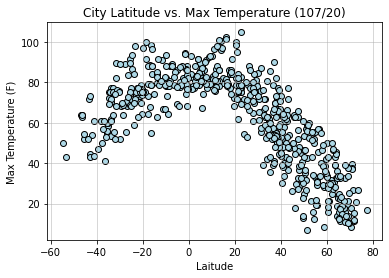

In [42]:

# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(city_clean_data["Lat"], city_clean_data["MaxTemp"], facecolor = "lightblue", edgecolor = "black")

# Set title/
plt.title("City Latitude vs. Max Temperature (107/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

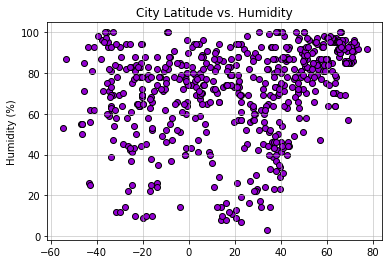

In [43]:
# Create Latitude vs. Humnidity Plot scatter plot
plt.scatter(city_clean_data["Lat"],city_clean_data["Humidity"], facecolor = "darkviolet", edgecolor = "black")

# Title/
plt.title("City Latitude vs. Humidity")

# Set xX.xlabel("Laitude")

# Y axis label
plt.ylabel("Humidity (%)")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save  as .pngs
plt.savefig("../City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

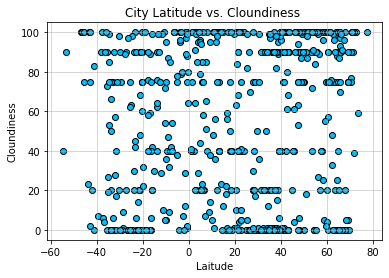

In [44]:
# Create Latitude vs. Cloundiness Plot scatter plot
plt.scatter(city_clean_data["Lat"], city_clean_data["Cloundiness"], facecolor = "deepskyblue", edgecolor = "black")

# Title/
plt.title("City Latitude vs. Cloundiness ")

#X axis label
plt.xlabel("Laitude")

# Y axis label
plt.ylabel("Cloundiness")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save  as .pngs
plt.savefig("../City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

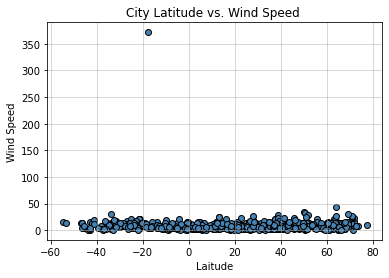

In [45]:
# Create Latitude vs. Wind Speed Plot scatter plot
plt.scatter(city_clean_data["Lat"], city_clean_data["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Title/
plt.title("City Latitude vs. Wind Speed ")

#X axis label
plt.xlabel("Laitude")

# Y axis label
plt.ylabel("Wind Speed")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save  as .pngs
plt.savefig("../City Latitude vs Wind.png")

## Linear Regression

In [46]:
#Define North and south
north = city_clean_data.loc[city_weather_df['Lat'] >= 0]
south = city_clean_data.loc[city_weather_df['Lat'] < 0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [47]:
# Perform a linear regression on temperature vs. latitude
x_values = north['MaxTemp']
y_values = north['Lat']
#city_clean_data.loc[:,("MaxTemp", 'Lat')]
# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
north['regress Temp'] = regress_values

north

-0.7261651582468801 79.32443654957692 -0.8716389784225392


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress Temp
0,Ghansor,22.65,79.95,82.40,61,40,2.24,19.488428
1,Manaure,11.78,-72.44,86.74,71,95,15.50,16.336871
3,North Bend,43.41,-124.22,54.00,93,90,3.36,40.111518
4,Rosarito,32.33,-117.03,66.00,72,90,2.89,31.397536
5,Manas,42.73,47.68,66.20,63,0,4.47,31.252303
...,...,...,...,...,...,...,...,...
577,Springfield,37.22,-93.30,39.99,78,90,9.17,50.285092
578,Baní,18.28,-70.33,84.99,79,40,7.14,17.607660
581,Kenai,60.55,-151.26,42.80,64,90,13.87,48.244568
583,Tāybād,34.74,60.78,54.03,40,0,15.08,40.089733


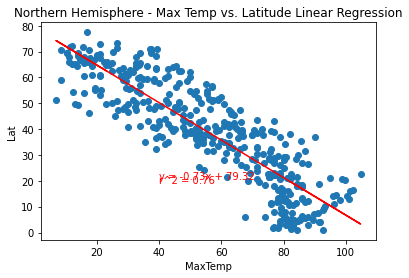

In [48]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('MaxTemp')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Northern - Max Temp Lat")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [49]:
# Perform a linear regression on temperature vs. latitude
#x_values = south['MaxTemp']
#y_values = south['Lat']
city_clean_data.loc[:, ('MaxTemp', 'Lat')]

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
south['regress temp'] = regress_values

south

-0.7261651582468801 79.32443654957692 -0.8716389784225392


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp
2,Mataura,-46.19,168.86,64.00,55,100,14.00,NaN
7,Ariquemes,-9.91,-63.04,93.52,46,95,3.31,NaN
13,Lüderitz,-26.65,15.16,68.00,58,0,16.37,NaN
15,Atuona,-9.80,-139.03,78.26,77,5,19.82,NaN
17,Hobart,-42.88,147.33,44.60,56,75,16.11,NaN
...,...,...,...,...,...,...,...,...
569,Palu,-0.89,119.87,76.53,80,99,2.06,NaN
579,Coxim,-18.51,-54.76,91.69,45,0,5.93,NaN
580,Porto Seguro,-16.45,-39.06,78.80,78,75,5.82,NaN
582,Henties Bay,-22.12,14.28,63.00,83,14,1.01,NaN


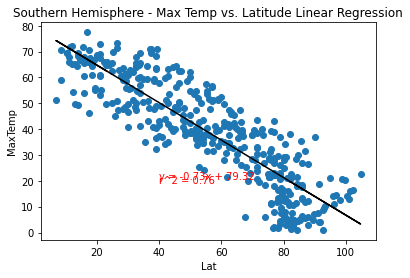

In [50]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='black')

plt.xlabel('Lat')
plt.ylabel('MaxTemp')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("South - Max Temp Lat")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [51]:
# Perform a linear regression on temperature vs. latitude
x_values = north['Humidity']
y_values = north['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
north['regress hum'] = regress_values

north

0.32099712658621865 15.145901346897158 0.35772978761860247


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress Temp,regress hum
0,Ghansor,22.65,79.95,82.40,61,40,2.24,19.488428,34.726726
1,Manaure,11.78,-72.44,86.74,71,95,15.50,16.336871,37.936697
3,North Bend,43.41,-124.22,54.00,93,90,3.36,40.111518,44.998634
4,Rosarito,32.33,-117.03,66.00,72,90,2.89,31.397536,38.257694
5,Manas,42.73,47.68,66.20,63,0,4.47,31.252303,35.368720
...,...,...,...,...,...,...,...,...,...
577,Springfield,37.22,-93.30,39.99,78,90,9.17,50.285092,40.183677
578,Baní,18.28,-70.33,84.99,79,40,7.14,17.607660,40.504674
581,Kenai,60.55,-151.26,42.80,64,90,13.87,48.244568,35.689717
583,Tāybād,34.74,60.78,54.03,40,0,15.08,40.089733,27.985786


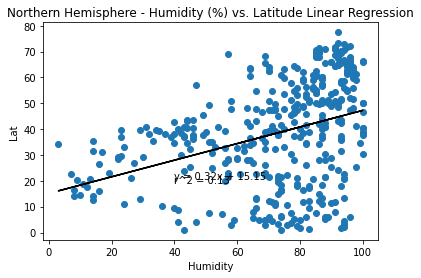

In [52]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='black')

plt.xlabel('Humidity')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='black')
plt.annotate(r_squared, (40, 19), color='black')
plt.savefig("Northern - Humitity Lat")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [53]:
# Perform a linear regression on temperature vs. latitude
x_values = south['Humidity']
y_values = south['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
south['regress hum'] = regress_values

south

-0.014123865169736266 -20.50914007386014 -0.023653690122247658


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress hum
2,Mataura,-46.19,168.86,64.00,55,100,14.00,NaN,-21.285953
7,Ariquemes,-9.91,-63.04,93.52,46,95,3.31,NaN,-21.158838
13,Lüderitz,-26.65,15.16,68.00,58,0,16.37,NaN,-21.328324
15,Atuona,-9.80,-139.03,78.26,77,5,19.82,NaN,-21.596678
17,Hobart,-42.88,147.33,44.60,56,75,16.11,NaN,-21.300077
...,...,...,...,...,...,...,...,...,...
569,Palu,-0.89,119.87,76.53,80,99,2.06,NaN,-21.639049
579,Coxim,-18.51,-54.76,91.69,45,0,5.93,NaN,-21.144714
580,Porto Seguro,-16.45,-39.06,78.80,78,75,5.82,NaN,-21.610802
582,Henties Bay,-22.12,14.28,63.00,83,14,1.01,NaN,-21.681421


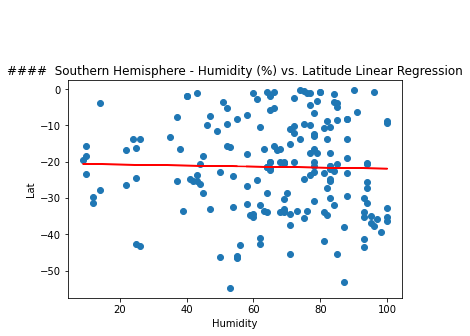

In [54]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Humidity')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("South - Humidity Lat")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [55]:
# Perform a linear regression on temperature vs. latitude
x_values = north['Cloundiness']
y_values = north['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
north['regress cloud'] = regress_values

north

0.06806363578944295 34.651768827722776 0.1346504302280478


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress Temp,regress hum,regress cloud
0,Ghansor,22.65,79.95,82.40,61,40,2.24,19.488428,34.726726,37.374314
1,Manaure,11.78,-72.44,86.74,71,95,15.50,16.336871,37.936697,41.117814
3,North Bend,43.41,-124.22,54.00,93,90,3.36,40.111518,44.998634,40.777496
4,Rosarito,32.33,-117.03,66.00,72,90,2.89,31.397536,38.257694,40.777496
5,Manas,42.73,47.68,66.20,63,0,4.47,31.252303,35.368720,34.651769
...,...,...,...,...,...,...,...,...,...,...
577,Springfield,37.22,-93.30,39.99,78,90,9.17,50.285092,40.183677,40.777496
578,Baní,18.28,-70.33,84.99,79,40,7.14,17.607660,40.504674,37.374314
581,Kenai,60.55,-151.26,42.80,64,90,13.87,48.244568,35.689717,40.777496
583,Tāybād,34.74,60.78,54.03,40,0,15.08,40.089733,27.985786,34.651769


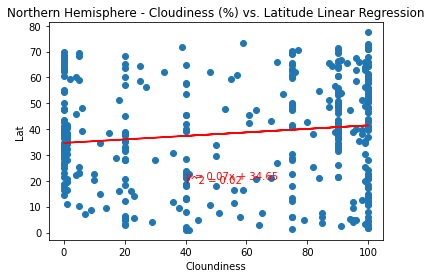

In [56]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Cloundiness')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Northern - Cloundiness Lat")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [57]:
x_values = south['Cloundiness']
y_values = south['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
south['regress scloud'] = regress_values

south

0.030202302771421222 -23.017113069652154 0.0883935952170008


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress hum,regress scloud
2,Mataura,-46.19,168.86,64.00,55,100,14.00,NaN,-21.285953,-19.996883
7,Ariquemes,-9.91,-63.04,93.52,46,95,3.31,NaN,-21.158838,-20.147894
13,Lüderitz,-26.65,15.16,68.00,58,0,16.37,NaN,-21.328324,-23.017113
15,Atuona,-9.80,-139.03,78.26,77,5,19.82,NaN,-21.596678,-22.866102
17,Hobart,-42.88,147.33,44.60,56,75,16.11,NaN,-21.300077,-20.751940
...,...,...,...,...,...,...,...,...,...,...
569,Palu,-0.89,119.87,76.53,80,99,2.06,NaN,-21.639049,-20.027085
579,Coxim,-18.51,-54.76,91.69,45,0,5.93,NaN,-21.144714,-23.017113
580,Porto Seguro,-16.45,-39.06,78.80,78,75,5.82,NaN,-21.610802,-20.751940
582,Henties Bay,-22.12,14.28,63.00,83,14,1.01,NaN,-21.681421,-22.594281


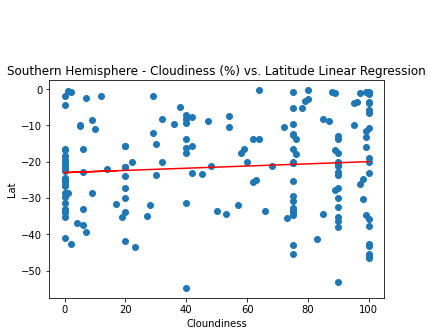

In [58]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Cloundiness')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("South - Cloundiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [59]:
# Perform a linear regression on temperature vs. latitude
x_values = north['Wind Speed']
y_values = north['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
north['regress wind'] = regress_values

south

0.689920569649702 32.682321863668804 0.21526016234967027


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress hum,regress scloud
2,Mataura,-46.19,168.86,64.00,55,100,14.00,NaN,-21.285953,-19.996883
7,Ariquemes,-9.91,-63.04,93.52,46,95,3.31,NaN,-21.158838,-20.147894
13,Lüderitz,-26.65,15.16,68.00,58,0,16.37,NaN,-21.328324,-23.017113
15,Atuona,-9.80,-139.03,78.26,77,5,19.82,NaN,-21.596678,-22.866102
17,Hobart,-42.88,147.33,44.60,56,75,16.11,NaN,-21.300077,-20.751940
...,...,...,...,...,...,...,...,...,...,...
569,Palu,-0.89,119.87,76.53,80,99,2.06,NaN,-21.639049,-20.027085
579,Coxim,-18.51,-54.76,91.69,45,0,5.93,NaN,-21.144714,-23.017113
580,Porto Seguro,-16.45,-39.06,78.80,78,75,5.82,NaN,-21.610802,-20.751940
582,Henties Bay,-22.12,14.28,63.00,83,14,1.01,NaN,-21.681421,-22.594281


AttributeError: module 'matplotlib.pyplot' has no attribute 'savegfig'

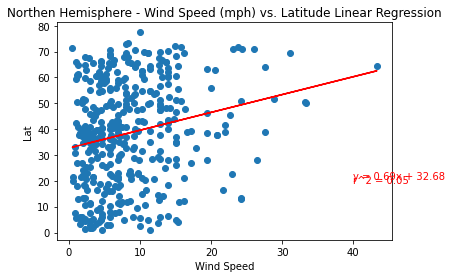

In [60]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Wind Speed')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Northen Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savegfig("North - Wind")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Perform a linear regression on temperature vs. latitude
x_values = south['Wind Speed']
y_values = south['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
south['regress wind'] = regress_values

south

In [ ]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Wind Speed')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savegfig("South - Wind")